In [1]:
import os
import cv2
from google.colab import drive


drive.mount('/content/drive')


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

folder1_path = '/content/drive/My Drive/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'
folder2_path = '/content/drive/My Drive/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'

MCI_images = load_images_from_folder(folder1_path)
AD_images = load_images_from_folder(folder2_path)

print("Class 1 Images:", len(MCI_images))
print("Class 2 Images:", len(AD_images))
test_image = MCI_images[0]
print(f"pixel value: {test_image[0,0]}")

Mounted at /content/drive
Class 1 Images: 689
Class 2 Images: 965
pixel value: 0


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Normalizing Data

In [12]:
import numpy as np
# import module
from sklearn.preprocessing import StandardScaler

def normalize(data):
    scaler = StandardScaler()
    model=scaler.fit(data)
    scaled_data=model.transform(data)
    return scaled_data

normalizedMCI_images = []
normalizedAD_images = []
for image in MCI_images:
    normalizedMCI_image = normalize(image)
    normalizedMCI_images.append(normalizedMCI_image)
for image in AD_images:
    normalizedAD_image = normalize(image)
    normalizedAD_images.append(normalizedAD_image)

normalizedAD_images = np.array(normalizedAD_images)
normalizedMCI_images = np.array(normalizedMCI_images)
print(normalizedAD_images.shape)

(965, 256, 256)


pixel value: 0.4845395410187215


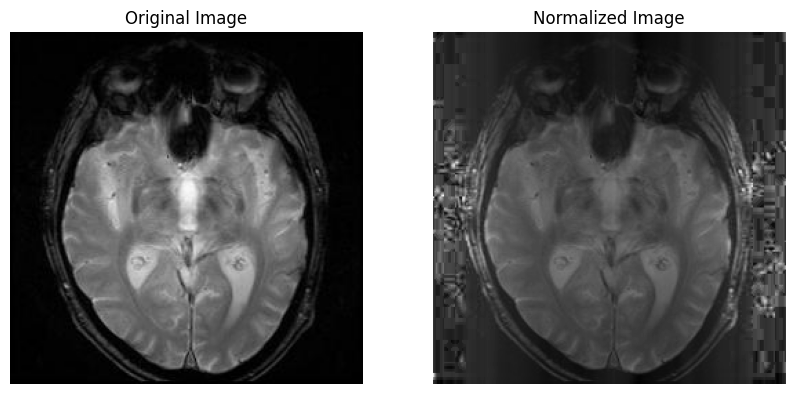

In [13]:
import matplotlib.pyplot as plt
import cv2

original_image = AD_images[0]
normalized_image = normalizedAD_images[0]

print(f"pixel value: {normalized_image[150,80]}")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Normalized Image')
plt.imshow(normalized_image, cmap = 'gray')
plt.axis('off')

plt.show()

In [ ]:
# import cv2
# import numpy as np

# def apply_adaptive_threshold(images):
#     thresholded_images = []
#     for image in images:
#         # Convert image to uint8 (required for adaptiveThreshold function)
#         image_uint8 = (image * 255).astype(np.uint8)
#         # Apply adaptive thresholding
#         thresholded_image = cv2.adaptiveThreshold(image_uint8, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)
#         # Convert thresholded image back to float and normalize to range [0, 1]
#         thresholded_image = thresholded_image.astype(np.float32) / 255.0
#         thresholded_images.append(thresholded_image)
#     return thresholded_images

# # Assuming normalizedMCI_images and normalizedAD_images are your normalized images
# thresholded_MCI_images = apply_adaptive_threshold(normalizedMCI_images)
# thresholded_AD_images = apply_adaptive_threshold(normalizedAD_images)

# # Plot the original and thresholded images side by side
# original_image = MCI_images[0]
# thresholded_image = thresholded_MCI_images[0]

# plt.figure(figsize=(10, 5))

# # Plot original image
# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(original_image, cmap='gray')
# plt.axis('off')

# # Plot thresholded image
# plt.subplot(1, 2, 2)
# plt.title('Thresholded Image')
# plt.imshow(thresholded_image, cmap='gray')
# plt.axis('off')

# plt.show()


In [14]:
import cv2

desired_width = 64
desired_height = 64

def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

resized_normalizedMCI_images = [resize_image(image, desired_width, desired_height) for image in normalizedMCI_images]

resized_normalizedAD_images = [resize_image(image, desired_width, desired_height) for image in normalizedAD_images]

resized_normalizedAD_images = np.array(resized_normalizedAD_images)
resized_normalizedMCI_images = np.array(resized_normalizedMCI_images)
print(resized_normalizedAD_images.shape)

(965, 64, 64)


We only use normalization and augmentation technique here as our data has already been preprocessed.

# Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def create_augmented_data_generator():
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        shear_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=15,
        zoom_range=0.2,
        fill_mode='nearest' 
    )
    return datagen

augmented_datagen = create_augmented_data_generator()

augmented_MCI_images = []
for image in resized_normalizedMCI_images:
    image_expanded = np.expand_dims(image, axis=-1) 
    image_expanded = np.expand_dims(image_expanded, axis=0)  
    augmented_image_batch = augmented_datagen.flow(image_expanded, batch_size=1)
    augmented_images = [next(augmented_image_batch)[0] for _ in range(4)]
    augmented_MCI_images.extend(augmented_images)

augmented_AD_images = []
for image in resized_normalizedAD_images:
    image_expanded = np.expand_dims(image, axis=-1)  
    image_expanded = np.expand_dims(image_expanded, axis=0)  
    augmented_image_batch = augmented_datagen.flow(image_expanded, batch_size=1)
    augmented_images = [next(augmented_image_batch)[0] for _ in range(4)]
    augmented_AD_images.extend(augmented_images)
augmented_AD_images = np.array(augmented_AD_images)
augmented_MCI_images = np.array(augmented_MCI_images)

In [16]:

num_augmented_MCI_images = len(augmented_MCI_images)
num_augmented_AD_images = len(augmented_AD_images)

augmented_AD_images_array = np.array(augmented_AD_images)
augmented_MCI_images_array = np.array(augmented_MCI_images)
print(augmented_AD_images_array.shape)

print("Number of augmented MCI images:", num_augmented_MCI_images)
print("Number of augmented AD images:", num_augmented_AD_images)


(3860, 64, 64, 1)
Number of augmented MCI images: 2756
Number of augmented AD images: 3860


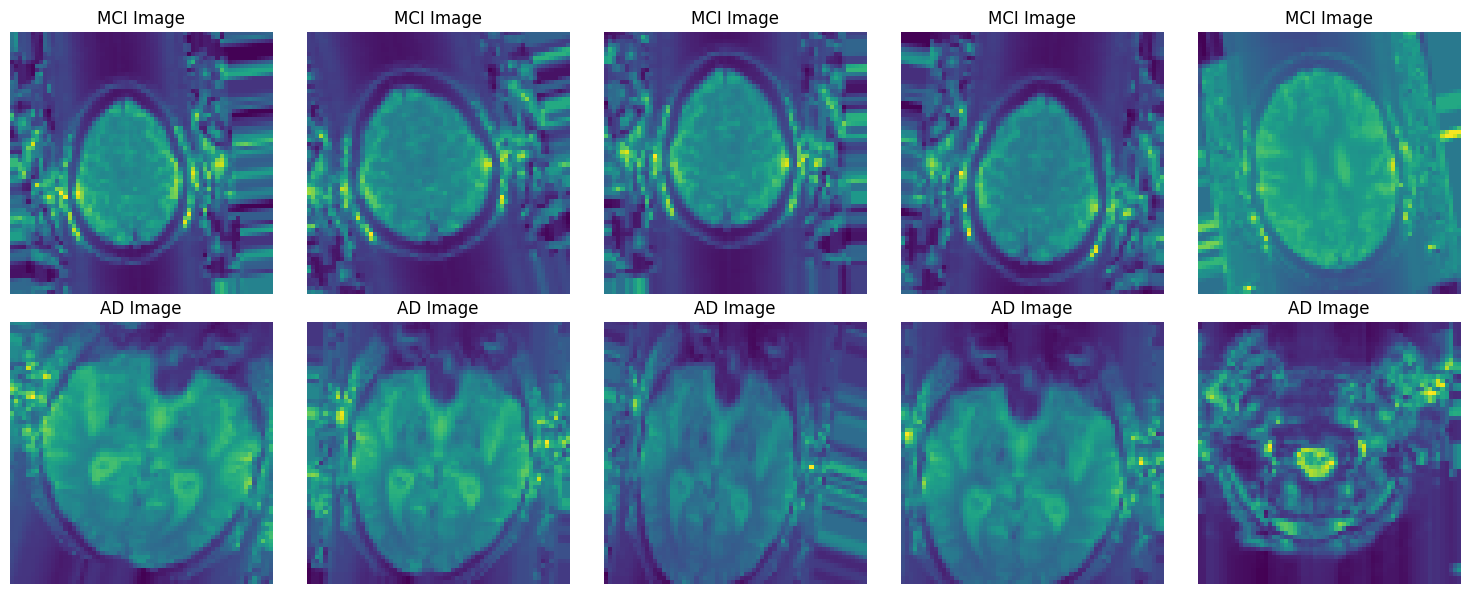

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axs[0, i].imshow(augmented_MCI_images[i])
    axs[0, i].set_title('MCI Image')
    axs[0, i].axis('off')

for i in range(5):
    axs[1, i].imshow(augmented_AD_images[i])
    axs[1, i].set_title('AD Image')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
print(resized_normalizedAD_images.shape)
augmented_MCI_images = np.squeeze(augmented_MCI_images)
augmented_AD_images = np.squeeze(augmented_AD_images)

all_MCI_images = np.concatenate([resized_normalizedMCI_images, augmented_MCI_images], axis=0)

print("Shape of all MCI images:", all_MCI_images.shape)
all_MCI_labels = ['MCI'] * len(normalizedMCI_images) + ['MCI'] * len(augmented_MCI_images)

all_AD_images = np.concatenate([resized_normalizedAD_images, augmented_AD_images], axis=0)

print("Shape of all AD images:", all_AD_images.shape)
all_AD_labels = ['AD'] * len(normalizedAD_images) + ['AD'] * len(augmented_AD_images)

all_AD_images_array = np.array(all_AD_images)
all_images = np.concatenate([all_MCI_images, all_AD_images], axis=0)

print("Shape of all images incluing MCI and AD:", all_images.shape)
all_labels = all_MCI_labels + all_AD_labels
all_labels = np.array(all_labels)
all_images_array = np.array(all_images)




(965, 64, 64)
Shape of all MCI images: (3445, 64, 64)
Shape of all AD images: (4825, 64, 64)
Shape of all images incluing MCI and AD: (8270, 64, 64)


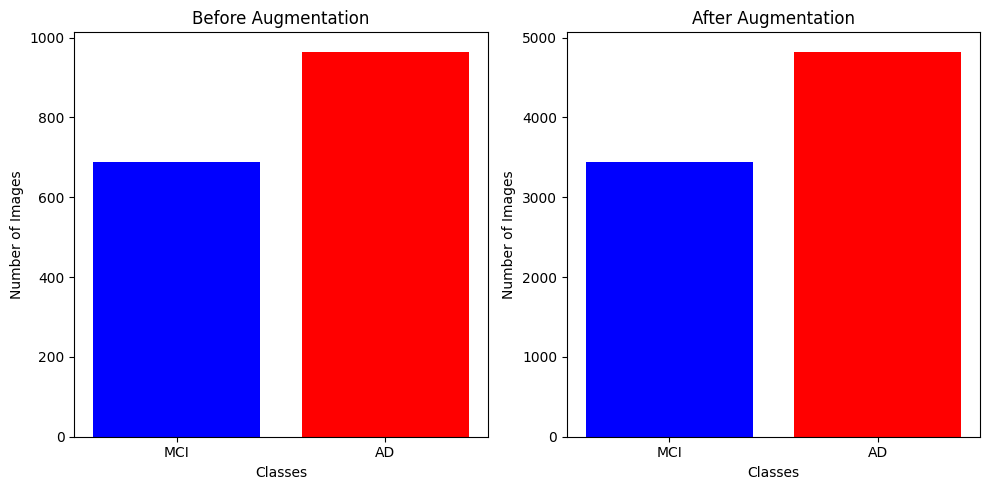

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(['MCI', 'AD'], [len(resized_normalizedMCI_images), len(resized_normalizedAD_images)], color=['blue', 'red'])
axs[0].set_title('Before Augmentation')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of Images')

axs[1].bar(['MCI', 'AD'], [len(all_MCI_images), len(all_AD_images)], color=['blue', 'red'])
axs[1].set_title('After Augmentation')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()


# Defining the proposed framework of the paper (with Glorot initialization and different split_size and batch_size and with dropout)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1) 
num_classes = 2  

model = Sequential()

model.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001 

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
initial_weights = model.get_weights()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_5 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_30 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_31 (Ba  (None, 62, 62, 32)       

In [ ]:

nbatch_sizes = [18,32,64,128,256]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
accuracy_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
loss_values = []
dsc_scores = []
split_sizes = []
batch_sizes = []
train_accuracy_scores =[]

for split_size in np.arange(0.1, 0.6, 0.1):
    for batch_size in nbatch_sizes:
        model.set_weights(initial_weights)

        print(f"training for split size : {split_size} and batch_size : {batch_size} is started")
        for num_running in range(8):
            print(f"num_running : { num_running}")
            X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_size, shuffle = True)

            X_train = np.expand_dims(X_train, axis=-1)
            X_val = np.expand_dims(X_val, axis=-1)
            X_test = np.expand_dims(X_test, axis=-1)

            label_encoder = LabelEncoder()

            y_train_encoded = label_encoder.fit_transform(y_train)

            y_val_encoded = label_encoder.transform(y_val)

            history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=5, validation_data=(X_val,y_val_encoded))

        train_accuracy = history.history['accuracy'][-1]
        train_accuracy_scores.append(train_accuracy)
        y_test_encoded = label_encoder.fit_transform(y_test)
        loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

        precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
        recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
        auc = roc_auc_score(y_test_encoded, y_pred_classes)
        cm = confusion_matrix(y_test_encoded, y_pred_classes)

        smooth = 1
        y_true_f = K.flatten(K.one_hot(y_test_encoded, num_classes=num_classes))
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        dsc = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        scaler_dsc = dsc.numpy()

        split_sizes.append(split_size)
        batch_sizes.append(batch_size)
        loss_values.append(loss)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auc_scores.append(auc)
        dsc_scores.append(scaler_dsc)



training for split size : 0.1 and batch_size : 18 is started
num_running : 0
Epoch 1/5
393/393 [==============================] - 15s 15ms/step - loss: 0.7031 - accuracy: 0.6399 - val_loss: 0.7770 - val_accuracy: 0.5636
Epoch 2/5
393/393 [==============================] - 4s 10ms/step - loss: 0.5843 - accuracy: 0.7052 - val_loss: 0.5851 - val_accuracy: 0.6934
Epoch 3/5
393/393 [==============================] - 4s 10ms/step - loss: 0.5162 - accuracy: 0.7463 - val_loss: 0.5608 - val_accuracy: 0.7137
Epoch 4/5
393/393 [==============================] - 5s 12ms/step - loss: 0.4647 - accuracy: 0.7830 - val_loss: 0.6305 - val_accuracy: 0.7061
Epoch 5/5
393/393 [==============================] - 4s 11ms/step - loss: 0.4249 - accuracy: 0.8079 - val_loss: 0.5370 - val_accuracy: 0.7290
num_running : 1
Epoch 1/5
393/393 [==============================] - 4s 10ms/step - loss: 0.4245 - accuracy: 0.8076 - val_loss: 0.4684 - val_accuracy: 0.8003
Epoch 2/5
393/393 [==============================] - 5

In [ ]:
results = []
print("with dropout results")
for i in range(len(split_sizes)):
    results.append({
        'Split Size': split_sizes[i],
        'Batch Size': batch_sizes[i],
        'Test Accuracy': accuracy_scores[i],
        'Train Accuracy' : train_accuracy_scores[i],
        'Precision': precision_scores[i],
        'Recall': recall_scores[i],
        'AUC': auc_scores[i],
        'Loss': loss_values[i],
        'DSC': dsc_scores[i]

    })

headers = results[0].keys()
rows = [result.values() for result in results]
print(tabulate(rows, headers=headers, tablefmt='grid'))

with dropout results
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-----------+----------+
|   Split Size |   Batch Size |   Test Accuracy |   Train Accuracy |   Precision |   Recall |      AUC |      Loss |      DSC |
+==============+==============+=================+==================+=============+==========+==========+===========+==========+
|          0.1 |           18 |        0.990338 |         0.971004 |    0.990374 | 0.990338 | 0.989639 | 0.031677  | 0.976681 |
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-----------+----------+
|          0.1 |           32 |        0.992754 |         0.985856 |    0.99277  | 0.992754 | 0.992954 | 0.0198842 | 0.985023 |
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-----------+----------+
|          0.1 |           64 |        0.985507 |         0.991231 |    0.986022 | 

# Defining the proposed framework of the paper (with Glorot initialization and different split_size and batch_size) and without dropout

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1) 
num_classes = 2

model8 = Sequential()
model8.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))
model8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())

model8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D((2, 2)))

model8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())

model8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D((2, 2)))

model8.add(Flatten())

model8.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())

model8.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model8.add(BatchNormalization())

model8.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001 

optimizer = Adam(learning_rate=learning_rate)

model8.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model8.summary()
initial_weights8 = model8.get_weights()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_7 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
accuracy_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
loss_values = []
dsc_scores = []
split_sizes = []
batch_sizes = []
train_accuracy_scores =[]
for split_size in np.arange(0.1, 0.6, 0.1):
    for batch_size in nbatch_sizes:
        model8.set_weights(initial_weights8)
        print(f"training for split size : {split_size} and batch_size : {batch_size} is started")
        for num_running in range(10):
            print(f"num_running : { num_running}")
            X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_size, shuffle = True)

            X_train = np.expand_dims(X_train, axis=-1)
            X_val = np.expand_dims(X_val, axis=-1)
            X_test = np.expand_dims(X_test, axis=-1)

            label_encoder = LabelEncoder()

            y_train_encoded = label_encoder.fit_transform(y_train)

            y_val_encoded = label_encoder.transform(y_val)

            history = model8.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=5, validation_data=(X_val,y_val_encoded))

        train_accuracy = history.history['accuracy'][-1] 
        train_accuracy_scores.append(train_accuracy)
        y_test_encoded = label_encoder.fit_transform(y_test)
        loss, accuracy = model8.evaluate(X_test, y_test_encoded, verbose=0)

        y_pred = model8.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

        precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
        recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
        auc = roc_auc_score(y_test_encoded, y_pred_classes)
        cm = confusion_matrix(y_test_encoded, y_pred_classes)

        smooth = 1
        y_true_f = K.flatten(K.one_hot(y_test_encoded, num_classes=num_classes))
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        dsc = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        scaler_dsc = dsc.numpy()

        split_sizes.append(split_size)
        batch_sizes.append(batch_size)
        loss_values.append(loss)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auc_scores.append(auc)
        dsc_scores.append(scaler_dsc)



training for split size : 0.1 and batch_size : 18 is started
num_running : 0
Epoch 1/5
393/393 [==============================] - 15s 11ms/step - loss: 0.6638 - accuracy: 0.6491 - val_loss: 0.5989 - val_accuracy: 0.6908
Epoch 2/5
393/393 [==============================] - 4s 10ms/step - loss: 0.5316 - accuracy: 0.7311 - val_loss: 0.5972 - val_accuracy: 0.6934
Epoch 3/5
393/393 [==============================] - 3s 8ms/step - loss: 0.4631 - accuracy: 0.7801 - val_loss: 0.6527 - val_accuracy: 0.6768
Epoch 4/5
393/393 [==============================] - 3s 8ms/step - loss: 0.4055 - accuracy: 0.8185 - val_loss: 0.5593 - val_accuracy: 0.7290
Epoch 5/5
393/393 [==============================] - 3s 8ms/step - loss: 0.3815 - accuracy: 0.8263 - val_loss: 0.5616 - val_accuracy: 0.7099
num_running : 1
Epoch 1/5
393/393 [==============================] - 3s 8ms/step - loss: 0.3578 - accuracy: 0.8474 - val_loss: 0.3269 - val_accuracy: 0.8613
Epoch 2/5
393/393 [==============================] - 3s 8m

In [ ]:
results = []
print("without dropout results")
for i in range(len(split_sizes)):
    results.append({
        'Split Size': split_sizes[i],
        'Batch Size': batch_sizes[i],
        'Test Accuracy': accuracy_scores[i],
        'Train Accuracy' : train_accuracy_scores[i],
        'Precision': precision_scores[i],
        'Recall': recall_scores[i],
        'AUC': auc_scores[i],
        'Loss': loss_values[i],
        'DSC': dsc_scores[i]

    })

headers = results[0].keys()
rows = [result.values() for result in results]
print(tabulate(rows, headers=headers, tablefmt='grid'))

without dropout results
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-------------+----------+
|   Split Size |   Batch Size |   Test Accuracy |   Train Accuracy |   Precision |   Recall |      AUC |        Loss |      DSC |
+==============+==============+=================+==================+=============+==========+==========+=============+==========+
|          0.1 |           18 |        0.992754 |         0.984441 |    0.992869 | 0.992754 | 0.993421 | 0.0339684   | 0.982382 |
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-------------+----------+
|          0.1 |           32 |        0.995169 |         0.992362 |    0.995208 | 0.995169 | 0.993939 | 0.0149894   | 0.990396 |
+--------------+--------------+-----------------+------------------+-------------+----------+----------+-------------+----------+
|          0.1 |           64 |        0.939614 |         0.996181

# Defining the proposed framework of the paper (with Glorot initialization and without dropout and different split_sizes)
#batch_size = 64

In [ ]:
split_sizes1 = [0.3, 0.5]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1)  
num_classes = 2 

model5 = Sequential()
model5.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Flatten())

model5.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())

model5.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model5.add(BatchNormalization())

model5.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001 

optimizer = Adam(learning_rate=learning_rate)

model5.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5.summary()
initial_weights5 = model5.get_weights()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_3 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_18 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
accuracy_scores_without_dropout = []

for split_size in split_sizes1:
        model5.set_weights(initial_weights5)
        print(f"training for split size : {split_size} is started")
        for num_running in range(10):
            print(f"num_running : { num_running}")
            X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_size, shuffle = True)

            X_train = np.expand_dims(X_train, axis=-1)
            X_val = np.expand_dims(X_val, axis=-1)
            X_test = np.expand_dims(X_test, axis=-1)

            label_encoder = LabelEncoder()

            y_train_encoded = label_encoder.fit_transform(y_train)

            y_val_encoded = label_encoder.transform(y_val)

            history = model5.fit(X_train, y_train_encoded, batch_size=64, epochs=5, validation_data=(X_val,y_val_encoded))

        y_test_encoded = label_encoder.fit_transform(y_test)
        loss, accuracy = model5.evaluate(X_test, y_test_encoded, verbose=0)
        accuracy_scores_without_dropout.append(accuracy)


training for split size : 0.3 is started
num_running : 0
Epoch 1/5
86/86 [==============================] - 8s 38ms/step - loss: 0.6550 - accuracy: 0.6703 - val_loss: 0.7794 - val_accuracy: 0.4098
Epoch 2/5
86/86 [==============================] - 2s 21ms/step - loss: 0.4352 - accuracy: 0.7934 - val_loss: 1.2782 - val_accuracy: 0.4094
Epoch 3/5
86/86 [==============================] - 2s 21ms/step - loss: 0.3083 - accuracy: 0.8702 - val_loss: 0.6948 - val_accuracy: 0.6165
Epoch 4/5
86/86 [==============================] - 2s 19ms/step - loss: 0.2222 - accuracy: 0.9129 - val_loss: 0.7392 - val_accuracy: 0.6088
Epoch 5/5
86/86 [==============================] - 2s 19ms/step - loss: 0.1289 - accuracy: 0.9593 - val_loss: 1.3097 - val_accuracy: 0.5787
num_running : 1
Epoch 1/5
86/86 [==============================] - 2s 22ms/step - loss: 0.3058 - accuracy: 0.8782 - val_loss: 0.3859 - val_accuracy: 0.8354
Epoch 2/5
86/86 [==============================] - 2s 20ms/step - loss: 0.1425 - accura

# Training the proposed framework of the paper (with Glorot initialization and with dropout and different split_sizes)
# batch-size = 64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
accuracy_scores_with_dropout = []

for split_size in split_sizes1:
        model.set_weights(initial_weights)
        print(f"training for split size : {split_size} is started")
        for num_running in range(10):
            print(f"num_running : { num_running}")
            X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_size, shuffle = True)

            X_train = np.expand_dims(X_train, axis=-1)
            X_val = np.expand_dims(X_val, axis=-1)
            X_test = np.expand_dims(X_test, axis=-1)

            label_encoder = LabelEncoder()

            y_train_encoded = label_encoder.fit_transform(y_train)

            y_val_encoded = label_encoder.transform(y_val)

            history = model.fit(X_train, y_train_encoded, batch_size=64, epochs=5, validation_data=(X_val,y_val_encoded))

        y_test_encoded = label_encoder.fit_transform(y_test)
        loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
        accuracy_scores_with_dropout.append(accuracy)


training for split size : 0.3 is started
num_running : 0
Epoch 1/5
86/86 [==============================] - 8s 39ms/step - loss: 0.8013 - accuracy: 0.6063 - val_loss: 0.6651 - val_accuracy: 0.6122
Epoch 2/5
86/86 [==============================] - 3s 31ms/step - loss: 0.5711 - accuracy: 0.7056 - val_loss: 0.6597 - val_accuracy: 0.6042
Epoch 3/5
86/86 [==============================] - 3s 29ms/step - loss: 0.5137 - accuracy: 0.7530 - val_loss: 0.8055 - val_accuracy: 0.4994
Epoch 4/5
86/86 [==============================] - 3s 31ms/step - loss: 0.4551 - accuracy: 0.7831 - val_loss: 0.6744 - val_accuracy: 0.6339
Epoch 5/5
86/86 [==============================] - 3s 29ms/step - loss: 0.3898 - accuracy: 0.8271 - val_loss: 0.6105 - val_accuracy: 0.6873
num_running : 1
Epoch 1/5
86/86 [==============================] - 3s 32ms/step - loss: 0.4226 - accuracy: 0.8061 - val_loss: 0.4803 - val_accuracy: 0.7582
Epoch 2/5
86/86 [==============================] - 3s 29ms/step - loss: 0.3217 - accura

# Comparing the results of with dropout and withoutdropout for each split size

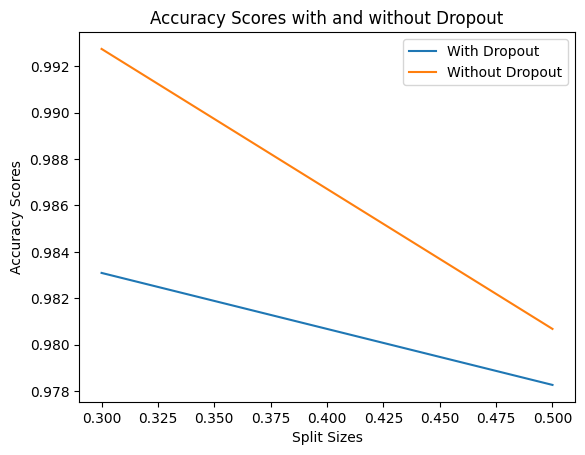

In [ ]:
import matplotlib.pyplot as plt

split_sizes = [0.3, 0.5]

plt.plot(split_sizes, accuracy_scores_with_dropout, label="With Dropout")

plt.plot(split_sizes, accuracy_scores_without_dropout, label="Without Dropout")

plt.xlabel('Split Sizes')
plt.ylabel('Accuracy Scores')

plt.title('Accuracy Scores with and without Dropout')

plt.legend()

plt.show()


# Training the proposed framework with Glorot Initializaton and without dropout(for initializer comparison) split size of 0.5 and batch size of 256

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
model.set_weights(initial_weights)
for num_running in range(10):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history = model8.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_Glorot = model8.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_Glorot = history.history['accuracy'][-1]
print(f"test accuracy for Glorot Initializer: {accuracy_Glorot}")
print(f"train accuracy: {train_accuracy_Glorot}")



num_running : 0
Epoch 1/5
16/16 [==============================] - 10s 123ms/step - loss: 0.7338 - accuracy: 0.6133 - val_loss: 0.7003 - val_accuracy: 0.4944
Epoch 2/5
16/16 [==============================] - 1s 80ms/step - loss: 0.4554 - accuracy: 0.7897 - val_loss: 0.7025 - val_accuracy: 0.4605
Epoch 3/5
16/16 [==============================] - 1s 75ms/step - loss: 0.3214 - accuracy: 0.8740 - val_loss: 0.6896 - val_accuracy: 0.5374
Epoch 4/5
16/16 [==============================] - 1s 74ms/step - loss: 0.1837 - accuracy: 0.9506 - val_loss: 0.7152 - val_accuracy: 0.4786
Epoch 5/5
16/16 [==============================] - 1s 76ms/step - loss: 0.0925 - accuracy: 0.9865 - val_loss: 0.7598 - val_accuracy: 0.4712
num_running : 1
Epoch 1/5
16/16 [==============================] - 1s 92ms/step - loss: 0.3779 - accuracy: 0.8495 - val_loss: 0.9340 - val_accuracy: 0.4183
Epoch 2/5
16/16 [==============================] - 1s 68ms/step - loss: 0.1933 - accuracy: 0.9371 - val_loss: 0.7252 - val_acc

# Defining the proposed framework of the paper (with one initialization)

As we can see here the model gets stuck in local optium and it is beacuse of the nature of data numbers which is much fewer than that in article

In [ ]:


from keras.initializers import Ones

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1)  
num_classes = 2  

model4 = Sequential()
model4.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())

model4.add(Dense(64, activation='relu', kernel_initializer=Ones))
model4.add(BatchNormalization())
model4.add(Dense(num_classes, activation='softmax'))



In [ ]:
import keras
from keras.optimizers.schedules import ExponentialDecay
import math
from tensorflow.keras.callbacks import LearningRateScheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.95,
    decay_steps=500,
    decay_rate=0.2
)

learning_rate = 0.1  

optimizer = Adam(learning_rate=learning_rate)

def lr_exp_decay(epoch, lr):
    k = 0.1 
    return learning_rate * math.exp(-k * epoch)

class LearningRateLoggingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        tf.summary.scalar('learning rate', data=lr, step=epoch)

model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.summary()
initial_weights4 = model4.get_weights()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
model4.set_weights(initial_weights4)
for num_running in range(1):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history = model4.fit(X_train, y_train_encoded, batch_size=256, epochs=20, validation_data=(X_val,y_val_encoded),callbacks=[
    LearningRateScheduler(lr_exp_decay, verbose=1),
    LearningRateLoggingCallback()
])

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_one = model4.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_one = history.history['accuracy'][-1]
print(f"test accuracy for one initializer: {accuracy_one}")
print(f"train accuracy for one initializer: {train_accuracy_one}")



num_running : 0

Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/20
 6/16 [==========>...................] - ETA: 0s - loss: 2.4707 - accuracy: 0.5417

16/16 [==============================] - 3s 167ms/step - loss: 1.7665 - accuracy: 0.5305 - val_loss: 2704.6206 - val_accuracy: 0.4178 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.09048374180359596.
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 0.7323 - accuracy: 0.5094 - val_loss: 25.1095 - val_accuracy: 0.4178 - lr: 0.0905

Epoch 3: LearningRateScheduler setting learning rate to 0.0818730753077982.
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 0.6924 - accuracy: 0.5313 - val_loss: 27.1376 - val_accuracy: 0.5822 - lr: 0.0819

Epoch 4: LearningRateScheduler setting learning rate to 0.0740818220681718.
Epoch 4/20
16/16 [==============================] - 1s 72ms/step - loss: 0.6844 - accuracy: 0.5838 - val_loss: 22.8385 - val_accuracy: 0.5822 - lr: 0.0741

Epoch 5: LearningRateScheduler setting learning rate to 0.06703200460356394.
Epoch 5/20
16/16 [==============================] - 1s 67ms/step - loss: 0.680

# Defining the proposed framework of the paper (with zero initialization)

In [ ]:

from keras.initializers import zeros

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1) 
num_classes = 2  

model6 = Sequential()
model6.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))

model6.add(Flatten())

model6.add(Dense(128, activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())

model6.add(Dense(64, activation='relu', kernel_initializer=zeros))
model6.add(BatchNormalization())
model6.add(Dense(num_classes, activation='softmax'))



In [ ]:

learning_rate = 0.1  

optimizer = Adam(learning_rate=learning_rate)

def lr_exp_decay(epoch, lr):
    k = 0.1 
    return learning_rate * math.exp(-k * epoch)

class LearningRateLoggingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        tf.summary.scalar('learning rate', data=lr, step=epoch)

model6.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6.summary()
initial_weights6 = model6.get_weights()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
model6.set_weights(initial_weights6)
for num_running in range(1):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history = model6.fit(X_train, y_train_encoded, batch_size=256, epochs=20, validation_data=(X_val,y_val_encoded),callbacks=[
    LearningRateScheduler(lr_exp_decay, verbose=1),
    LearningRateLoggingCallback()
])

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_zero = model6.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_zero = history.history['accuracy'][-1]
print(f"test accuracy for zero initializer: {accuracy_zero}")
print(f"train accuracy for zero initializer: {train_accuracy_zero}")



num_running : 0

Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/20
 6/16 [==========>...................] - ETA: 0s - loss: 0.7023 - accuracy: 0.5970

16/16 [==============================] - 5s 105ms/step - loss: 0.6911 - accuracy: 0.5845 - val_loss: 0.6926 - val_accuracy: 0.5815 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.09048374180359596.
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 0.6831 - accuracy: 0.5713 - val_loss: 0.6829 - val_accuracy: 0.5815 - lr: 0.0905

Epoch 3: LearningRateScheduler setting learning rate to 0.0818730753077982.
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 0.6823 - accuracy: 0.5845 - val_loss: 0.6880 - val_accuracy: 0.5815 - lr: 0.0819

Epoch 4: LearningRateScheduler setting learning rate to 0.0740818220681718.
Epoch 4/20
16/16 [==============================] - 1s 71ms/step - loss: 0.6817 - accuracy: 0.5845 - val_loss: 0.6802 - val_accuracy: 0.5815 - lr: 0.0741

Epoch 5: LearningRateScheduler setting learning rate to 0.06703200460356394.
Epoch 5/20
16/16 [==============================] - 1s 73ms/step - loss: 0.6791 - ac

# Defining the proposed framework of the paper (with random normal) without dropout

In [ ]:

random_normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1)
num_classes = 2 

model7 = Sequential()
model7.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))

random_normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)

model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())
model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())
model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))

model7.add(Flatten())

model7.add(Dense(128, activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())

model7.add(Dense(64, activation='relu', kernel_initializer=random_normal_initializer))
model7.add(BatchNormalization())
model7.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001 

optimizer = Adam(learning_rate=learning_rate)

model7.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model7.summary()

initial_weights7 = model7.get_weights()


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_9 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_54 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_55 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                      

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
model7.set_weights(initial_weights7)
for num_running in range(10):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history = model7.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_random = model7.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_random = history.history['accuracy'][-1]
print(f"test accuracy for random initializer: {accuracy_random}")
print(f"train accuracy for random initializer: {train_accuracy_random}")



num_running : 0
Epoch 1/5
16/16 [==============================] - 2s 106ms/step - loss: 0.7125 - accuracy: 0.6245 - val_loss: 0.6769 - val_accuracy: 0.6115
Epoch 2/5
16/16 [==============================] - 2s 95ms/step - loss: 0.4932 - accuracy: 0.7704 - val_loss: 0.6710 - val_accuracy: 0.5724
Epoch 3/5
16/16 [==============================] - 1s 88ms/step - loss: 0.3540 - accuracy: 0.8511 - val_loss: 0.7087 - val_accuracy: 0.5724
Epoch 4/5
16/16 [==============================] - 2s 99ms/step - loss: 0.2401 - accuracy: 0.9109 - val_loss: 0.7588 - val_accuracy: 0.5724
Epoch 5/5
16/16 [==============================] - 1s 90ms/step - loss: 0.1403 - accuracy: 0.9588 - val_loss: 0.8507 - val_accuracy: 0.5724
num_running : 1
Epoch 1/5
16/16 [==============================] - 2s 139ms/step - loss: 0.3964 - accuracy: 0.8373 - val_loss: 0.6999 - val_accuracy: 0.5820
Epoch 2/5
16/16 [==============================] - 2s 104ms/step - loss: 0.2415 - accuracy: 0.9104 - val_loss: 0.7140 - val_ac

# Training the proposed model with None as kernel-initilizer

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

input_shape = (64, 64, 1) 
num_classes = 2

model10 = Sequential()
model10.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))

random_normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)

model10.add(Conv2D(32, (3, 3), activation='relu'))
model10.add(BatchNormalization())
model10.add(Conv2D(32, (3, 3), activation='relu'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D((2, 2)))

model10.add(Conv2D(32, (3, 3), activation='relu'))
model10.add(BatchNormalization())
model10.add(Conv2D(32, (3, 3), activation='relu'))
model10.add(BatchNormalization())
model10.add(MaxPooling2D((2, 2)))

model10.add(Flatten())

model10.add(Dense(128, activation='relu'))
model10.add(BatchNormalization())

model10.add(Dense(64, activation='relu'))
model10.add(BatchNormalization())
model10.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model10.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model10.summary()

initial_weights10 = model10.get_weights()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_10 (ZeroPad  (None, 66, 66, 1)         0         
 ding2D)                                                         
                                                                 
 conv2d_40 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_60 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_41 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_61 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                     

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate
model10.set_weights(initial_weights10)
for num_running in range(10):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history = model10.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_None = model10.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_None = history.history['accuracy'][-1]
print(f"test accuracy for random initializer: {accuracy_None}")
print(f"train accuracy for random initializer: {train_accuracy_None}")



num_running : 0
Epoch 1/5
16/16 [==============================] - 9s 108ms/step - loss: 0.7187 - accuracy: 0.6329 - val_loss: 0.6843 - val_accuracy: 0.5468
Epoch 2/5
16/16 [==============================] - 1s 68ms/step - loss: 0.4431 - accuracy: 0.8037 - val_loss: 0.7810 - val_accuracy: 0.4282
Epoch 3/5
16/16 [==============================] - 1s 68ms/step - loss: 0.2899 - accuracy: 0.9012 - val_loss: 1.0122 - val_accuracy: 0.4188
Epoch 4/5
16/16 [==============================] - 1s 75ms/step - loss: 0.1706 - accuracy: 0.9580 - val_loss: 1.0403 - val_accuracy: 0.4190
Epoch 5/5
16/16 [==============================] - 1s 69ms/step - loss: 0.0835 - accuracy: 0.9906 - val_loss: 1.3722 - val_accuracy: 0.4190
num_running : 1
Epoch 1/5
16/16 [==============================] - 1s 91ms/step - loss: 0.3703 - accuracy: 0.8503 - val_loss: 1.4094 - val_accuracy: 0.4157
Epoch 2/5
16/16 [==============================] - 1s 69ms/step - loss: 0.2055 - accuracy: 0.9328 - val_loss: 1.0255 - val_accu

# Comparing results for different initializers

Looking at the trianing process of proposed model with one and zero initialization we find that as the data number is lower than that of the article the model gets stuck in a local optimium no matter which optimization technique is applied.

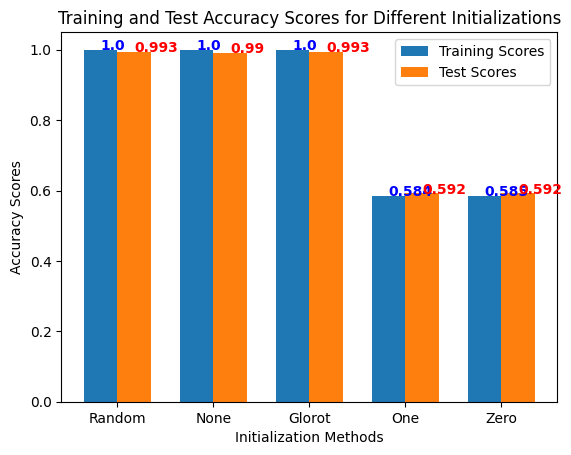

In [44]:
import numpy as np
import matplotlib.pyplot as plt

initializations = ['Random', 'None', 'Glorot', 'One', 'Zero']
train_scores = [train_accuracy_random, train_accuracy_None, train_accuracy_Glorot, train_accuracy_one, train_accuracy_zero]
test_scores = [accuracy_random, accuracy_None, accuracy_Glorot, accuracy_one, accuracy_zero]

train_scores = [round(score, 3) for score in train_scores]
test_scores = [round(score, 3) for score in test_scores]

X = np.arange(len(initializations))

bar_width = 0.35

plt.bar(X - bar_width/2, train_scores, bar_width, label='Training Scores')

plt.bar(X + bar_width/2, test_scores, bar_width, label='Test Scores')

plt.xticks(X, initializations)
plt.xlabel('Initialization Methods')
plt.ylabel('Accuracy Scores')
plt.title('Training and Test Accuracy Scores for Different Initializations')

plt.legend()

for i, v in enumerate(train_scores):
    plt.text(X[i] - bar_width/2, v, str(v), color='blue', fontweight='bold')
for i, v in enumerate(test_scores):
    plt.text(X[i] + bar_width/2, v, str(v), color='red', fontweight='bold')

plt.show()



# Defining the first test structure of the paper
From here on, the split size is 0.5 and the batches are 256, also the models doenst have dropout

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D

input_shape = (64, 64, 1) 
num_classes = 2 

model2 = Sequential()
model2.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
چ
model2.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()
initial_weights2 = model2.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 66, 66, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                        

In [24]:
from sklearn.preprocessing import LabelEncoder
model2.set_weights(initial_weights2)
for num_running in range(10):
    print(f"num_running : { num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)

    history2 = model2.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))



num_running : 0
Epoch 1/5
16/16 [==============================] - 10s 101ms/step - loss: 0.9810 - accuracy: 0.5932 - val_loss: 0.6524 - val_accuracy: 0.6087
Epoch 2/5
16/16 [==============================] - 1s 37ms/step - loss: 0.4936 - accuracy: 0.7543 - val_loss: 0.7140 - val_accuracy: 0.4633
Epoch 3/5
16/16 [==============================] - 1s 36ms/step - loss: 0.3899 - accuracy: 0.8358 - val_loss: 1.2701 - val_accuracy: 0.4127
Epoch 4/5
16/16 [==============================] - 1s 37ms/step - loss: 0.2961 - accuracy: 0.8867 - val_loss: 2.5769 - val_accuracy: 0.4091
Epoch 5/5
16/16 [==============================] - 1s 37ms/step - loss: 0.2048 - accuracy: 0.9338 - val_loss: 3.7443 - val_accuracy: 0.4091
num_running : 1
Epoch 1/5
16/16 [==============================] - 1s 48ms/step - loss: 0.3894 - accuracy: 0.8376 - val_loss: 4.2257 - val_accuracy: 0.4180
Epoch 2/5
16/16 [==============================] - 1s 33ms/step - loss: 0.2206 - accuracy: 0.9246 - val_loss: 5.5956 - val_acc

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow.keras.backend as K
import pandas as pd
import numpy
from tabulate import tabulate

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_first = model2.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_first = history2.history['accuracy'][-1]
print(f"test accuracy for first test model: {accuracy_first}")
print(f"train accuracy for first test model: {train_accuracy_first}")
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

precision_first = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall_first = recall_score(y_test_encoded, y_pred_classes, average='weighted')
auc_first = roc_auc_score(y_test_encoded, y_pred_classes)

smooth = 1
y_true_f = K.flatten(K.one_hot(y_test_encoded, num_classes=num_classes))
y_pred_f = K.flatten(y_pred)
intersection = K.sum(y_true_f * y_pred_f)
dsc = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
scaler_dsc_first = dsc.numpy()


test accuracy for first test model: 1.0
train accuracy for first test model: 1.0
13/13 [==============================] - 0s 4ms/step


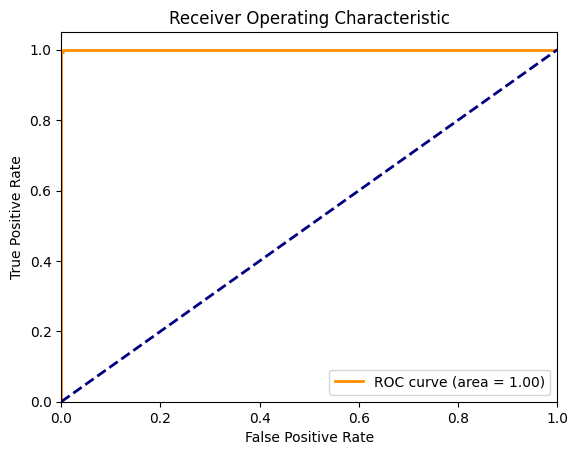

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import  auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred[:, 1], pos_label=1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Defining the second test model of the paper

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, ZeroPadding2D

input_shape = (64, 64, 1) 
num_classes = 2 

model3 = Sequential()
model3.add(ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=input_shape))

model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())

model3.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(BatchNormalization())

model3.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.summary()
initial_weights3 = model3.get_weights()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 66, 66, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_4 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                      

In [32]:
from sklearn.preprocessing import LabelEncoder
model3.set_weights(initial_weights3)
for num_running in range(10):
    print(f"num running: {num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)
    history3 = model3.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))

num running: 0
Epoch 1/5
16/16 [==============================] - 6s 126ms/step - loss: 0.7501 - accuracy: 0.6273 - val_loss: 0.6883 - val_accuracy: 0.5412
Epoch 2/5
16/16 [==============================] - 1s 53ms/step - loss: 0.4773 - accuracy: 0.7795 - val_loss: 0.7469 - val_accuracy: 0.4402
Epoch 3/5
16/16 [==============================] - 1s 63ms/step - loss: 0.3671 - accuracy: 0.8559 - val_loss: 0.9645 - val_accuracy: 0.4193
Epoch 4/5
16/16 [==============================] - 1s 54ms/step - loss: 0.2725 - accuracy: 0.9012 - val_loss: 2.3257 - val_accuracy: 0.4175
Epoch 5/5
16/16 [==============================] - 1s 64ms/step - loss: 0.1812 - accuracy: 0.9488 - val_loss: 3.3840 - val_accuracy: 0.4175
num running: 1
Epoch 1/5
16/16 [==============================] - 1s 81ms/step - loss: 0.3592 - accuracy: 0.8455 - val_loss: 4.5389 - val_accuracy: 0.4173
Epoch 2/5
16/16 [==============================] - 1s 54ms/step - loss: 0.2195 - accuracy: 0.9213 - val_loss: 5.6655 - val_accura

In [38]:

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_second = model3.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_second = history3.history['accuracy'][-1]
print(f"test accuracy for second test model: {accuracy_second}")
print(f"train accuracy for second test model: {train_accuracy_second}")
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

precision_second = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall_second = recall_score(y_test_encoded, y_pred_classes, average='weighted')
auc_second = roc_auc_score(y_test_encoded, y_pred_classes)

smooth = 1
y_true_f = K.flatten(K.one_hot(y_test_encoded, num_classes=num_classes))
y_pred_f = K.flatten(y_pred)
intersection = K.sum(y_true_f * y_pred_f)
dsc = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
scaler_dsc_second = dsc.numpy()


test accuracy for second test model: 0.9951691031455994
train accuracy for second test model: 1.0
13/13 [==============================] - 0s 6ms/step


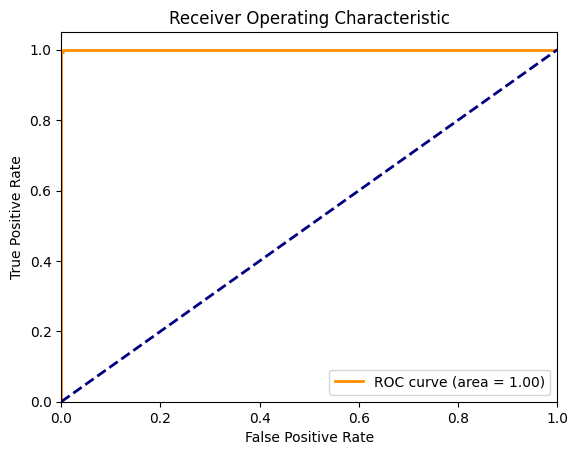

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import  auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred[:, 1], pos_label=1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Training the proposed framework without dropout

In [43]:
from sklearn.preprocessing import LabelEncoder
model8.set_weights(initial_weights8)
for num_running in range(10):
    print(f"num running: {num_running}")
    X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.05, shuffle =True)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True)

    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    label_encoder = LabelEncoder()

    y_train_encoded = label_encoder.fit_transform(y_train)

    y_val_encoded = label_encoder.transform(y_val)
    history = model8.fit(X_train, y_train_encoded, batch_size=256, epochs=5, validation_data=(X_val,y_val_encoded))

num running: 0
Epoch 1/5
16/16 [==============================] - 8s 126ms/step - loss: 0.7642 - accuracy: 0.6146 - val_loss: 0.7119 - val_accuracy: 0.4412
Epoch 2/5
16/16 [==============================] - 1s 67ms/step - loss: 0.4544 - accuracy: 0.7887 - val_loss: 0.6696 - val_accuracy: 0.6008
Epoch 3/5
16/16 [==============================] - 1s 67ms/step - loss: 0.2946 - accuracy: 0.8964 - val_loss: 0.6728 - val_accuracy: 0.5820
Epoch 4/5
16/16 [==============================] - 1s 74ms/step - loss: 0.1713 - accuracy: 0.9547 - val_loss: 0.6677 - val_accuracy: 0.5853
Epoch 5/5
16/16 [==============================] - 1s 74ms/step - loss: 0.0914 - accuracy: 0.9875 - val_loss: 0.7058 - val_accuracy: 0.5817
num running: 1
Epoch 1/5
16/16 [==============================] - 1s 81ms/step - loss: 0.3987 - accuracy: 0.8304 - val_loss: 0.6680 - val_accuracy: 0.5860
Epoch 2/5
16/16 [==============================] - 1s 67ms/step - loss: 0.2090 - accuracy: 0.9320 - val_loss: 0.6483 - val_accura

In [44]:

y_test_encoded = label_encoder.fit_transform(y_test)
loss, accuracy_frame = model8.evaluate(X_test, y_test_encoded, verbose=0)
train_accuracy_frame = history.history['accuracy'][-1]
print(f"test accuracy for second test model: {accuracy_frame}")
print(f"train accuracy for second test model: {train_accuracy_frame}")
y_pred = model8.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

precision_frame = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall_frame = recall_score(y_test_encoded, y_pred_classes, average='weighted')
auc_frame = roc_auc_score(y_test_encoded, y_pred_classes)

smooth = 1
y_true_f = K.flatten(K.one_hot(y_test_encoded, num_classes=num_classes))
y_pred_f = K.flatten(y_pred)
intersection = K.sum(y_true_f * y_pred_f)
dsc = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
scaler_dsc_frame = dsc.numpy()

test accuracy for second test model: 0.9951691031455994
train accuracy for second test model: 1.0
13/13 [==============================] - 0s 3ms/step


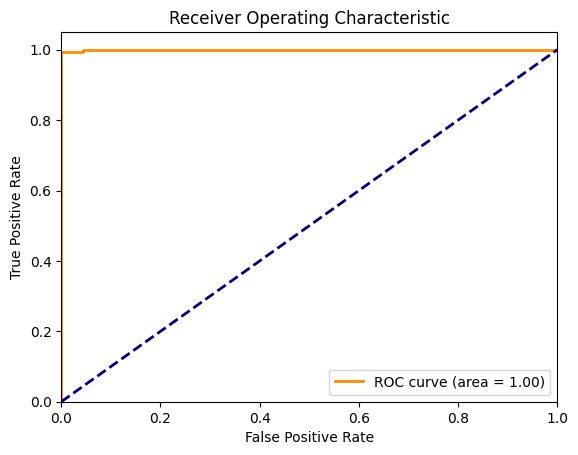

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import  auc
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred[:, 1], pos_label=1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Comparing the results of different structures

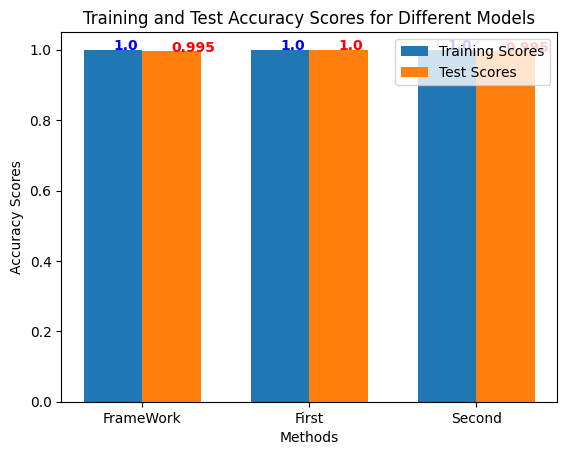

In [46]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['FrameWork', 'First', 'Second']
train_scores = [train_accuracy_frame, train_accuracy_first, train_accuracy_second]
test_scores = [accuracy_frame, accuracy_first, accuracy_second]

train_scores_rounded = [round(score, 3) for score in train_scores]
test_scores_rounded = [round(score, 3) for score in test_scores]

X = np.arange(len(methods))

bar_width = 0.35

plt.bar(X - bar_width/2, train_scores, bar_width, label='Training Scores')

plt.bar(X + bar_width/2, test_scores, bar_width, label='Test Scores')

plt.xticks(X, methods)
plt.xlabel('Methods')
plt.ylabel('Accuracy Scores')
plt.title('Training and Test Accuracy Scores for Different Models')

plt.legend()

for i, v in enumerate(train_scores_rounded):
    plt.text(X[i] - bar_width/2, v, str(v), color='blue', fontweight='bold')
for i, v in enumerate(test_scores_rounded):
    plt.text(X[i] + bar_width/2, v, str(v), color='red', fontweight='bold')

plt.show()



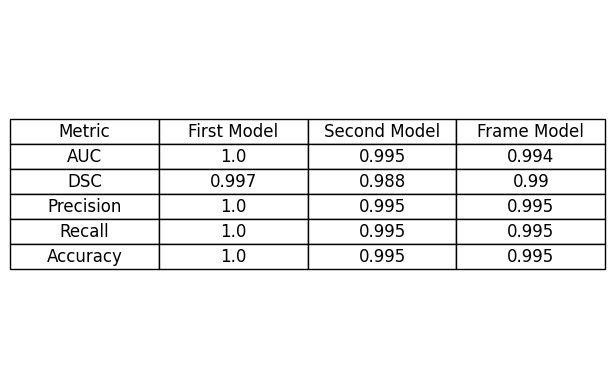

In [47]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    ['Metric', 'First Model', 'Second Model','Frame Model'],
    ['AUC', round(auc_first,3), round(auc_second,3), round(auc_frame,3)],
    ['DSC', round(scaler_dsc_first,3), round(scaler_dsc_second,3), round(scaler_dsc_frame,3)],
    ['Precision', round(precision_first,3), round(precision_second,3), round(precision_frame,3)],
    ['Recall', round(recall_first,3), round(recall_second,3), round(recall_frame,3)],
    ['Accuracy', round(accuracy_first,3), round(accuracy_second,3),round(accuracy_frame,3)]
]

fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center', cellLoc='center', colWidths=[0.3, 0.3, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

ax.axis('off')

plt.show()